# 자산배분 투자 기본


#### 2019 [FinanceData.KR]()

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)

In [0]:
!pip install -q finance-datareader

## ETF 종목 리스팅

In [3]:
import FinanceDataReader as fdr

etfs = fdr.EtfListing()
etfs.head(10)

,Symbol,Name
0,069500,KODEX 200
1,102110,TIGER 200
2,122630,KODEX 레버리지
3,153130,KODEX 단기채권
4,148020,KBSTAR 200
5,273130,KODEX 종합채권(AA-이상)액티브
6,233740,KODEX 코스닥150 레버리지
7,102780,KODEX 삼성그룹
8,278530,KODEX 200TR
9,214980,KODEX 단기채권PLUS


In [4]:
len(etfs)

436

## ETF 종목 선정

주식과 채권을 두 가지 ETF 상품
* KODEX 200 (069500)
* KODEX 국채선물10년 (152380)

In [5]:
mask = etfs['Symbol'].isin(['069500', '152380'])

etfs.loc[mask]

,Symbol,Name
0,069500,KODEX 200
179,152380,KODEX 국채선물10년


여러 종목의 종가(Close)를 하나의 데이터프레임에 합치기

참고: https://www.notion.so/FinanceDataReader-6d1430f7ddf740b39cf6f6369650d672

In [6]:
import pandas as pd

start, end = '2018-01-01', '2018-12-31'

tiker_list = ['069500', '152380']
df_list = [fdr.DataReader(ticker, start, end)['Close'] for ticker in tiker_list]

df = pd.concat(df_list, axis=1)
df.columns = ['KODEX_200', 'KODEX_10YF']
df.head(10)

,KODEX_200,KODEX_10YF
Date,,
2018-01-02,31690,64445
2018-01-03,31825,64360
2018-01-04,31574,64365
2018-01-05,32003,64310
2018-01-08,32219,64255
2018-01-09,32090,64045
2018-01-10,31882,63620
2018-01-11,31718,63880
2018-01-12,31776,63730


## 퍼포먼스 비교

누적 수익률 계산 첫번째 행(row)로 모두 나누고 1일 빼준다

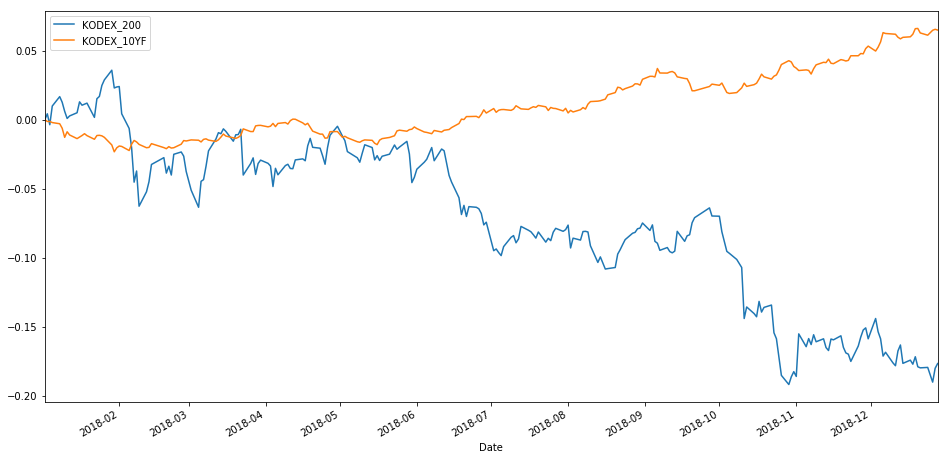

In [7]:
df_return = df / df.iloc[0] - 1
df_return.plot()

In [8]:
# 최종 수익률
df_return.iloc[-1]

KODEX_200    -0.176743
KODEX_10YF    0.064939
Name: 2018-12-28 00:00:00, dtype: float64

다음과 같이 계산도 가능 (결과는 동일)

```python 
df_return = df.pct_change().fillna(0).add(1).cumprod().sub(1)
```


## 포트폴리오 수익률

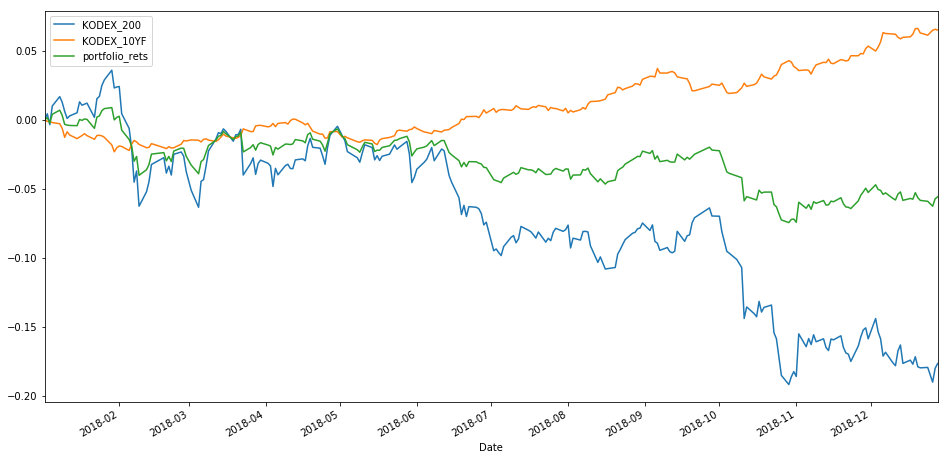

In [9]:
# KODEX_200	KODEX_10YF 가중치
KODEX_200_W, KODEX_10YF_W = 0.5, 0.5

df_return['portfolio_rets'] = (df_return[['KODEX_200', 'KODEX_10YF']] * [KODEX_200_W, KODEX_10YF_W]).sum(axis=1)
df_return.plot()

In [10]:
df_return.iloc[-1]

KODEX_200        -0.176743
KODEX_10YF        0.064939
portfolio_rets   -0.055902
Name: 2018-12-28 00:00:00, dtype: float64

## 기간과 가중치를 변경 테스트

In [0]:
import pandas as pd

tiker_list = ['069500', '152380']
tiker_names = ['KODEX_200', 'KODEX_10YF']

def asset_alloc(start, end, W1, W2):
  df_list = [fdr.DataReader(ticker, start, end)['Close'] for ticker in tiker_list]
  df = pd.concat(df_list, axis=1)
  df.columns = tiker_names

  df_return = df / df.iloc[0] - 1
  df_return['port_rets'] = (df_return[tiker_names] * [W1, W2]).sum(axis=1)
  df_return.plot()
  return df_return.iloc[-1], df_return.describe()


(KODEX_200     0.266701
 KODEX_10YF   -0.015557
 port_rets     0.210250
 Name: 2017-12-28 00:00:00, dtype: float64,
         KODEX_200  KODEX_10YF   port_rets
 count  243.000000  243.000000  243.000000
 mean     0.165301   -0.007600    0.130721
 std      0.090977    0.007356    0.072094
 min      0.000000   -0.027835    0.000000
 25%      0.074374   -0.012087    0.058668
 50%      0.189457   -0.005262    0.151589
 75%      0.236029   -0.002517    0.186394
 max      0.310904    0.005491    0.243843)

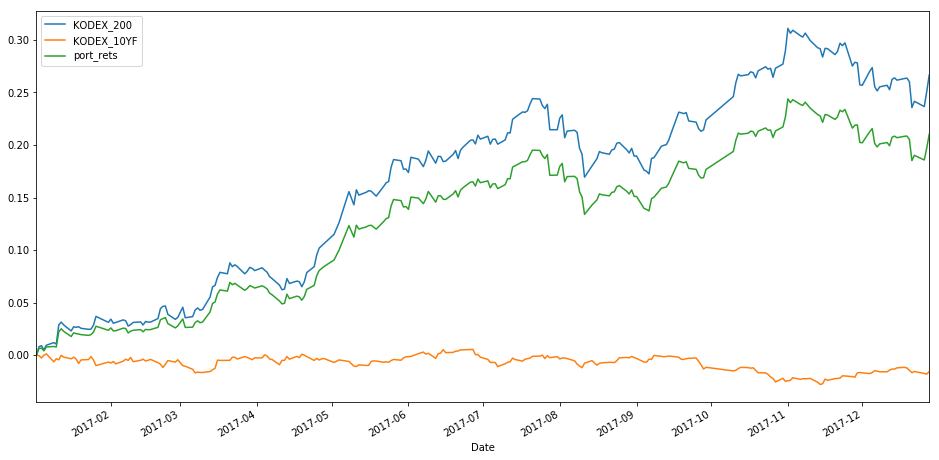

In [12]:
asset_alloc('2017-01-01', '2017-12-31', 0.8, 0.2)

(KODEX_200    -0.176743
 KODEX_10YF    0.064939
 port_rets     0.016603
 Name: 2018-12-28 00:00:00, dtype: float64,
         KODEX_200  KODEX_10YF   port_rets
 count  244.000000  244.000000  244.000000
 mean    -0.073115    0.010427   -0.006281
 std      0.059500    0.024493    0.009943
 min     -0.191922   -0.023276   -0.026878
 25%     -0.101830   -0.011153   -0.012519
 50%     -0.070590    0.005470   -0.009091
 75%     -0.026112    0.029696    0.000014
 max      0.035847    0.066103    0.018400)

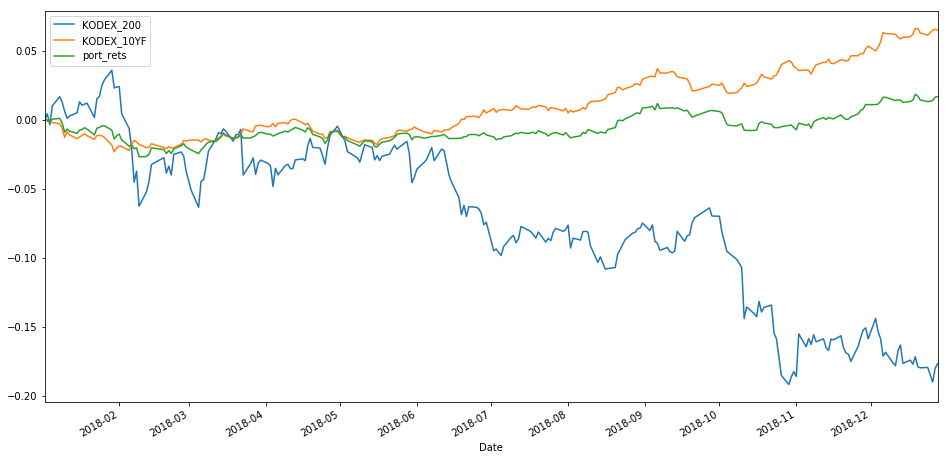

In [13]:
asset_alloc('2018-01-01', '2018-12-31', 0.2, 0.8)

#### 2019 [FinanceData.KR]()